In [1]:
# Install necessary packages
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt


def clean_data(df):
    # Drop rows with missing data in column: 'Sector'
    df = df.dropna(subset=['Sector'])
    # Fill missing values in 'Notes' column with an empty string
    df['Notes'] = df['Notes'].fillna('')
    # Convert 'Founded' column to datetime
    df['Founded'] = pd.to_datetime(df['Founded'], errors='coerce')
    return df

# Loaded variable 'df' from URI: c:\Users\HP\Desktop\python data\INDIA NOTABLE COMPANIES\notable_companies (1).csv
df = pd.read_csv(r'c:\Users\HP\Desktop\python data\INDIA NOTABLE COMPANIES\notable_companies (1).csv')

df_clean = clean_data(df.copy())
df_clean.head()

Note: you may need to restart the kernel to use updated packages.


,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
0,63 Moons Technologies,Technology,Software,Mumbai,1988,Financial technology,P,A
1,Aban Offshore,Energy,Oil & gas offshore drilling & other services,Chennai,1986,"Oil, petrochemical",P,A
2,ABG Shipyard,Industrials,Shipbuilding,Ahmedabad,1985,Ship engineering,P,A
3,ABP Group,Consumer services,Broadcasting & entertainment,Kolkata,1922,"Media, news",P,A
4,ACC,Industrials,Cement,Mumbai,1936,Cement,P,A


In [2]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 492
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            448 non-null    object
 1   Industry        448 non-null    object
 2   Sector          448 non-null    object
 3   Headquarters    448 non-null    object
 4   Founded         448 non-null    object
 5   Notes           445 non-null    object
 6   Private/State   448 non-null    object
 7   Active/Defunct  448 non-null    object
dtypes: object(8)
memory usage: 31.5+ KB
None


In [3]:
print(df_clean.describe())


                         Name     Industry Sector Headquarters Founded  \
count                     448          448    448          448     448   
unique                    448           18    101           59     124   
top     63 Moons Technologies  Industrials  Banks       Mumbai    1995   
freq                        1          112     31          130      12   

         Notes Private/State Active/Defunct  
count      445           448            448  
unique     327             2              2  
top     Pharma             P              A  
freq        11           345            440  


In [4]:
print(df_clean.isnull().sum())


Name              0
Industry          0
Sector            0
Headquarters      0
Founded           0
Notes             3
Private/State     0
Active/Defunct    0
dtype: int64


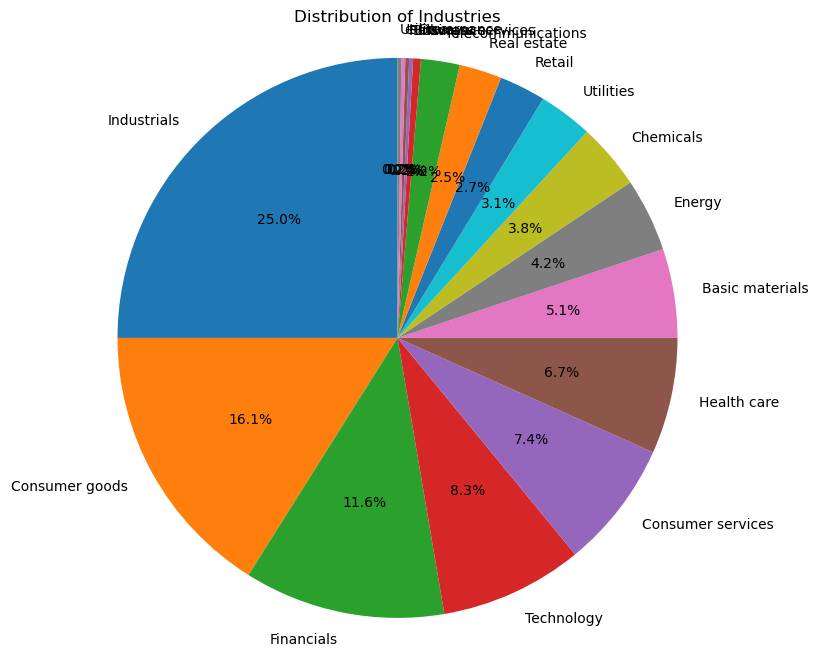

Top 3 Industries:
Industrials       112
Consumer goods     72
Financials         52
Name: Industry, dtype: int64


In [5]:
# Count the occurrences of each industry
industry_counts = df_clean['Industry'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(industry_counts.values, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Industries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Print the top 3 industries
print("Top 3 Industries:")
print(df_clean['Industry'].value_counts().head(3))


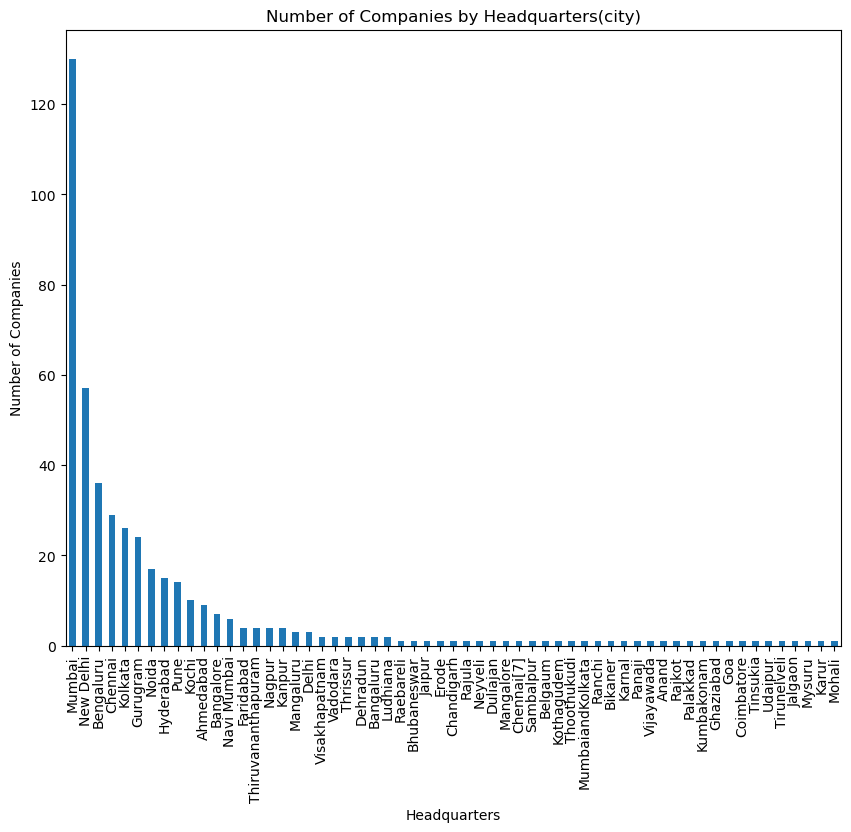

In [6]:
# Count the occurrences of each headquarters
headquarters_counts = df_clean['Headquarters'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
headquarters_counts.plot(kind='bar')
plt.title('Number of Companies by Headquarters(city)')
plt.xlabel('Headquarters')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

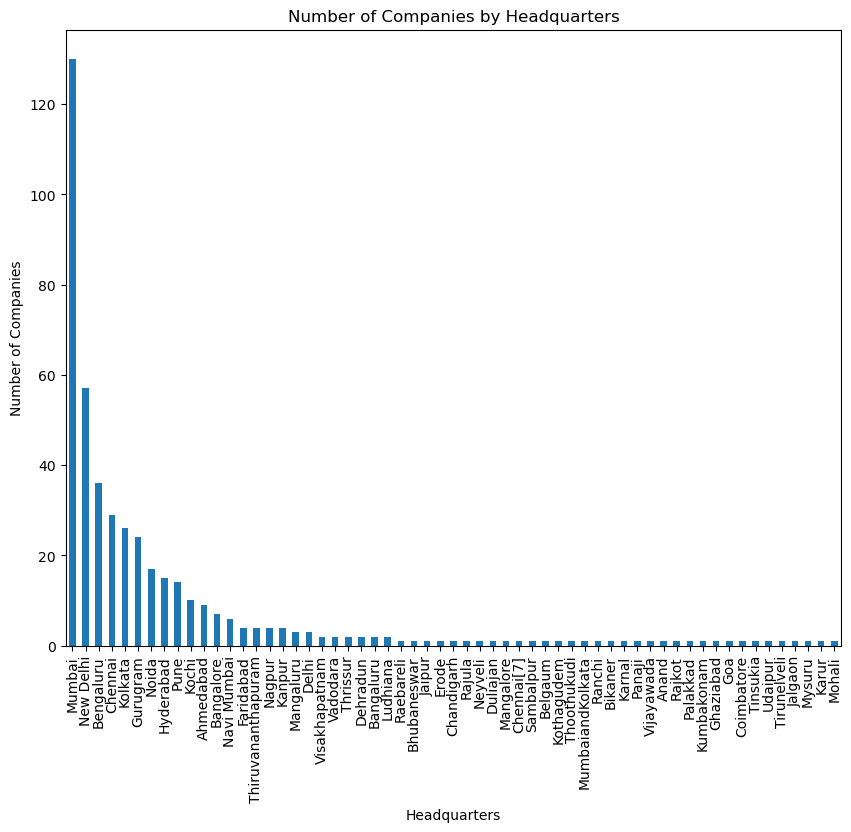

In [7]:
headquarters_counts = df_clean['Headquarters'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8))
headquarters_counts.plot(kind='bar')
plt.title('Number of Companies by Headquarters')
plt.xlabel('Headquarters')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()


In [8]:
# Distribution of Companies by Sector
sector_counts = df_clean['Sector'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
sector_counts.plot(kind='bar')
plt.title('Number of Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()


In [9]:
# Distribution of Companies by Founded Year
df_clean['Founded'] = pd.to_datetime(df_clean['Founded'], errors='coerce')
founded_counts = df_clean['Founded'].dt.year.value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 8))
founded_counts.plot(kind='line')
plt.title('Number of Companies Founded by Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.show()


In [10]:
# Distribution of Companies by Private/State
private_state_counts = df_clean['Private/State'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(private_state_counts.values, labels=private_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Companies by Private/State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [11]:
# Distribution of Companies by Active/Defunct
active_defunct_counts = df_clean['Active/Defunct'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(active_defunct_counts.values, labels=active_defunct_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Companies by Active/Defunct')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
